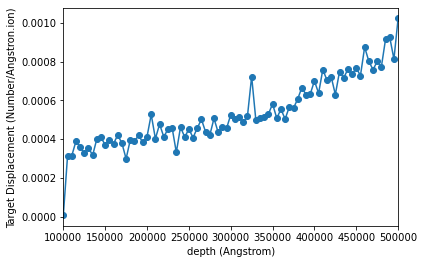

101.34230166666667 displacements/ion


In [78]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import integrate

def format_table(file,init,end):
    lines_data = []
    for i, line in enumerate(file):
        if i in np.arange(init, end): 
            lines_data.append(line) 
    data_array = np.loadtxt(lines_data)
    return data_array

def dpa_calc(y,x):
    # Get only data from 10um to 34 um.
    i = 0
    new_x = []
    new_y = []
    while(i < len(x)):
        if (x[i] > 1e5) and (x[i] <= 3.4e5):
            #print(yeap)
            new_x.append(x[i])
            new_y.append(y[i])
        i += 1
    #now integrate 
    dpa = integrate.simpson(new_y,new_x)
    return dpa
    
#ions = ["H", "He", "Li" ,"Be", "B", "C", "N", "O", "F", "Ne"]
#energies = [4.0,8.0,10.0,15.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0] # MeV

ions = ["Be"]
energies = [30.0] # MeV
def plot(x,y):
    plt.plot(x,y)
    plt.scatter(x,y)
    plt.xlabel("depth (Angstrom)")
    plt.ylabel("Target Displacement (Number/Angstron.ion)")
    plt.xlim(1e5,5e5)
    #plt.ylim(0,0.075)
    plt.show()
    
for ion in ions:
    for energy in energies:
        file_path = "TRIM_outputs/{0}/{1}/".format(ion,energy)
        try:
            vacancy_file = open(file_path + "VACANCY.txt", 'r')
            repCol_file = open(file_path + "NOVAC.txt", 'r') 
            vacancy_array = format_table(vacancy_file,init=34,end=134)
            repCol_array = format_table(repCol_file,init=29,end=129)
            target_displacement = np.add(vacancy_array[:,5], repCol_array[:,1])
            plot(vacancy_array[:,0], target_displacement)
            displacements_ion = dpa_calc(target_displacement,vacancy_array[:,0])
            print("{0} displacements/ion".format(displacements_ion))
        except:
            #print("Not found data for {0} {1} MeV".format(ion,energy))
            pass

        